# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.
Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States


# 1.Hierarchical clustering

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
x = df.iloc[:,1:]

In [7]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [8]:
x = pd.DataFrame(x,columns=df.iloc[:,1:].columns)

In [9]:
x.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [10]:
# Creation of dendrogram and linkage

In [11]:
from scipy.cluster import hierarchy

In [12]:
lk = hierarchy.linkage(x,method="complete")

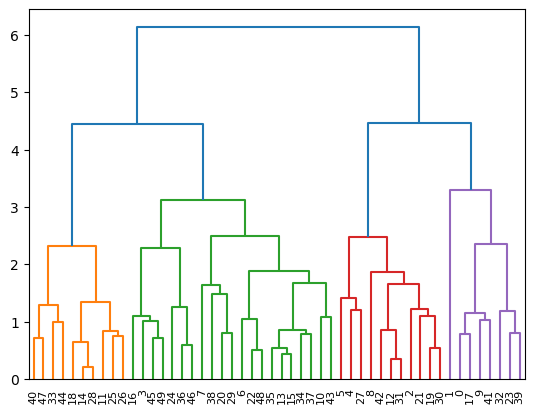

In [13]:
dendrogram = hierarchy.dendrogram(lk)

 - from above dendrogram it seems that there are four clusters in crime dataset

In [14]:
# Model Building


In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
hc=AgglomerativeClustering(n_clusters=4)

ylabel = hc.fit_predict(x)

In [17]:
ylabel

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [18]:
df["H_cluster"] = ylabel

df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [19]:
df.groupby('H_cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
H_cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


In [20]:
df[df['H_cluster']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_cluster
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
24,Missouri,9.0,178,70,28.2,0
29,New Jersey,7.4,159,89,18.8,0


In [21]:
df[df['H_cluster']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_cluster
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [22]:
df[df['H_cluster']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_cluster
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2


In [23]:
df[df['H_cluster']==3]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_cluster
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


# 2.Kmeans clustering 

In [24]:
from sklearn.cluster import KMeans

In [25]:
km = KMeans()

K_cluster = km.fit_predict(x)

In [26]:
K_cluster

array([2, 3, 6, 7, 3, 3, 1, 7, 6, 2, 1, 0, 6, 7, 0, 7, 7, 2, 4, 6, 1, 3,
       0, 5, 7, 0, 0, 3, 0, 1, 6, 6, 5, 4, 7, 7, 7, 1, 1, 5, 4, 2, 6, 1,
       4, 7, 7, 4, 0, 7])

In [27]:
wcss = []

for i in range(1,20):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [28]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137275,
 57.55425863091104,
 50.07656289493946,
 43.92657990049797,
 40.01410622782431,
 34.51787307518053,
 32.62520005077519,
 26.856423116032712,
 26.002325079732135,
 22.90269002383699,
 21.11109395721102,
 18.971410524922504,
 18.22794406003604,
 16.941021079198627,
 15.806460748821573,
 14.866846548101154,
 14.13134257318721]

### Elbow graph

Text(0, 0.5, 'Wcss')

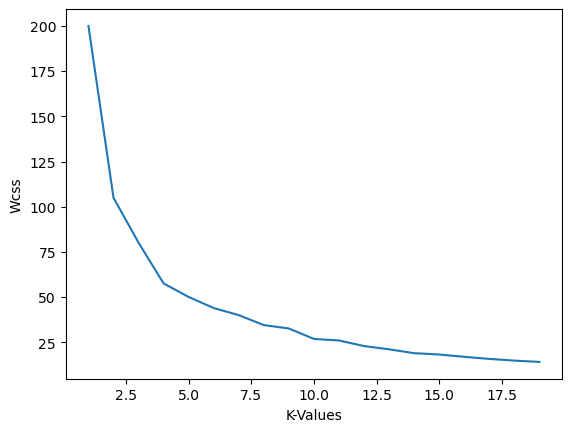

In [29]:
plt.plot(range(1,20),wcss)


plt.xlabel('K-Values')
plt.ylabel('Wcss')

In [30]:
km = KMeans(n_clusters=4)
ylabel=km.fit_predict(x)

In [31]:
ylabel

array([1, 0, 0, 1, 0, 0, 3, 3, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 2, 0, 3, 0,
       2, 1, 0, 2, 2, 0, 2, 3, 0, 0, 1, 2, 3, 3, 3, 3, 3, 1, 2, 1, 0, 3,
       2, 3, 3, 2, 2, 3])

In [32]:
df['K_cluster']=ylabel


In [33]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_cluster,K_cluster
0,Alabama,13.2,236,58,21.2,3,1
1,Alaska,10.0,263,48,44.5,1,0
2,Arizona,8.1,294,80,31.0,1,0
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,1,0
5,Colorado,7.9,204,78,38.7,1,0
6,Connecticut,3.3,110,77,11.1,0,3
7,Delaware,5.9,238,72,15.8,0,3
8,Florida,15.4,335,80,31.9,1,0
9,Georgia,17.4,211,60,25.8,3,1


In [34]:
km.cluster_centers_

array([[ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024]])

In [35]:
df.groupby('K_cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape,H_cluster
K_cluster,,,,,
0,10.815385,257.384615,76.000000,33.192308,0.923077
1,13.937500,243.625000,53.750000,21.412500,2.625000
2,3.600000,78.538462,52.076923,12.176923,1.846154
3,5.656250,138.875000,73.875000,18.781250,0.000000


# 3.DBSCAN

In [36]:
from sklearn.cluster import DBSCAN

In [37]:
db= DBSCAN()

db.fit_predict(x)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [38]:
db = DBSCAN(eps=2,min_samples=3)

y=db.fit_predict(x)

In [39]:
y

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
silhouette_score(x,db.fit_predict(x))

0.23455598753159795

In [42]:
df["Db_cluster"]=y

In [43]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_cluster,K_cluster,Db_cluster
0,Alabama,13.2,236,58,21.2,3,1,0
1,Alaska,10.0,263,48,44.5,1,0,-1
2,Arizona,8.1,294,80,31.0,1,0,0
3,Arkansas,8.8,190,50,19.5,0,1,0
4,California,9.0,276,91,40.6,1,0,0


In [44]:
df.groupby('Db_cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape,H_cluster,K_cluster
Db_cluster,,,,,,
-1,10.000000,263.000000,48.000000,44.500000,1.000000,0.000000
0,7.742857,168.877551,65.897959,20.757143,1.142857,1.673469


In [45]:
df[df['Db_cluster']==-1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_cluster,K_cluster,Db_cluster
1,Alaska,10.0,263,48,44.5,1,0,-1


In [46]:
df[df['Db_cluster']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_cluster,K_cluster,Db_cluster
0,Alabama,13.2,236,58,21.2,3,1,0
2,Arizona,8.1,294,80,31.0,1,0,0
3,Arkansas,8.8,190,50,19.5,0,1,0
4,California,9.0,276,91,40.6,1,0,0
5,Colorado,7.9,204,78,38.7,1,0,0
6,Connecticut,3.3,110,77,11.1,0,3,0
7,Delaware,5.9,238,72,15.8,0,3,0
8,Florida,15.4,335,80,31.9,1,0,0
9,Georgia,17.4,211,60,25.8,3,1,0
10,Hawaii,5.3,46,83,20.2,0,3,0


### Hierarchical and Kmeans gives there are four clusters but DBSCAN gives two clusters 